Question 1: Task1(K-NN Classification using Euclidean distance)

In [38]:
# Loading the dataset and dividing into labels and features
import scipy.io
import numpy as np
from statistics import mode

mat_train = scipy.io.loadmat("/content/mnist_train.mat")
mat_test = scipy.io.loadmat("/content/mnist_test.mat")
train_data_labels = np.array(mat_train["traindata"][:,0]).astype(int)
test_data_labels = np.array(mat_test["testdata"][:,0]).astype(int)
train_data_features = np.array(mat_train["traindata"][:,1:]).astype(int)
test_data_features = np.array(mat_test["testdata"][:,1:]).astype(int)

# function to calculate euclidean distance

def EuclideanDistance(sample_one,sample_two):
  return np.sqrt(np.sum((sample_one - sample_two)**2))


# function to find nearest neighbours and returns the predicted test labels for a given k

def knn_neighbours(train_data_features,train_data_labels,test_data_features,k):
  predicted_test_data_labels = []
  for x1 in test_data_features:
    distance  = [EuclideanDistance(x1,x2) for x2 in train_data_features]
    k_nearest_indices = np.argsort(distance)[:k]
    k_nearest_labels = train_data_labels[k_nearest_indices]
    predicted_label = mode(k_nearest_labels)
    predicted_test_data_labels.append(predicted_label)
  return np.array(predicted_test_data_labels)

# function to check accuracy for different k by validating predicted test labels and actual test labels

k_values = [1,3,5,9,11]
accuracies = []
for k in k_values :
  predicted_labels = knn_neighbours(train_data_features,train_data_labels,test_data_features,k)
  matched_labels = (np.sum(test_data_labels == predicted_labels)/len(test_data_labels))*100
  accuracies.append(matched_labels)

print(accuracies)


[90.60000000000001, 92.4, 91.2, 90.8, 89.0]


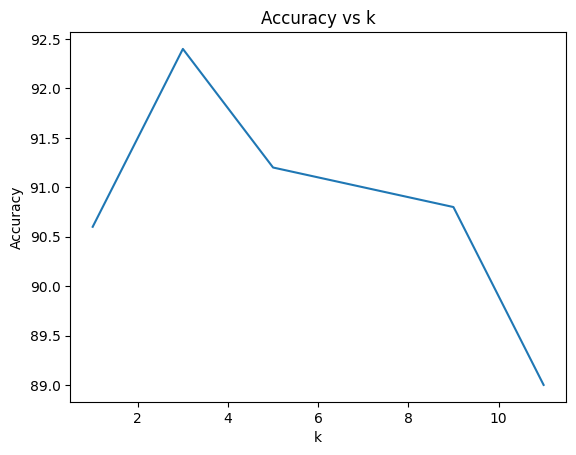

In [44]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k")
plt.plot(k_values,accuracies)
plt.show()

Question 1: Task1(K-NN Classification using NCC)


In [ ]:
# Loading the dataset and dividing into labels and features
import scipy.io
import numpy as np
from statistics import mode

mat_train = scipy.io.loadmat("/content/mnist_train.mat")
mat_test = scipy.io.loadmat("/content/mnist_test.mat")
train_data_labels = np.array(mat_train["traindata"][:,0]).astype(int)
test_data_labels = np.array(mat_test["testdata"][:,0]).astype(int)
train_data_features = np.array(mat_train["traindata"][:,1:]).astype(int)
test_data_features = np.array(mat_test["testdata"][:,1:]).astype(int)

# function to calculate NCC

def NCC(sample_one,sample_two):
  numerator = sample_one@(sample_two.T)
  denominator = np.sqrt(np.sum(sample_one*2))*np.sqrt(np.sum(sample_two*2))
  return 1 - numerator/denominator


# function to find nearest neighbours and returns the predicted test labels for a given k

def knn_neighbours(train_data_features,train_data_labels,test_data_features,k):
  predicted_test_data_labels = []
  for x1 in test_data_features:
    distance  = [NCC(x1,x2) for x2 in train_data_features]
    k_nearest_indices = np.argsort(distance)[:k]
    k_nearest_labels = train_data_labels[k_nearest_indices]
    predicted_label = mode(k_nearest_labels)
    predicted_test_data_labels.append(predicted_label)
  return np.array(predicted_test_data_labels)

# function to check accuracy for different k by validating predicted test labels and actual test labels

k_values = [1,3,5,9,11]
accuracies = []
for k in k_values :
  predicted_labels = knn_neighbours(train_data_features,train_data_labels,test_data_features,k)
  matched_labels = (np.sum(test_data_labels == predicted_labels)/len(test_data_labels))*100
  accuracies.append(matched_labels)

print(accuracies)


Based On Histogram:

In [67]:
test_feature_histogram = []
histograms = []
for row in test_data_features:
  histo,_ = np.histogram(row,bins = 784,range=(0,784))
  histograms.append(histo)
  test_feature_histogram = np.array(histograms)

test_feature_histogram.shape

train_feature_histogram = []
histograms = []
for row in train_data_features:
  histo,_ = np.histogram(row,bins = 784,range=(0,784))
  histograms.append(histo)
  train_feature_histogram = np.array(histograms)

train_feature_histogram.shape

k_values = [1, 3, 5, 9]
hist_accuracies = []
for k in k_values:
  hist_test_label_preds = knn_neighbours(train_feature_histogram, train_data_label, test_features_histogram, k)
  print(hist_test_label_preds.shape)
  common_labels_hist = (np.sum(test_data_label == hist_test_label_preds)/len(test_data_label))*100
  hist_accuracies.append(common_labels_hist)

print(hist_accuracies)